## Importing Data and Library

In [1]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing

# Import Data
df = pd.read_csv ('https://raw.githubusercontent.com/ihsanmauri/Bank-Marketing/main/bank.csv', sep = ',')

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings(action="ignore")

## Reading Data

In [3]:
df.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['deposit']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

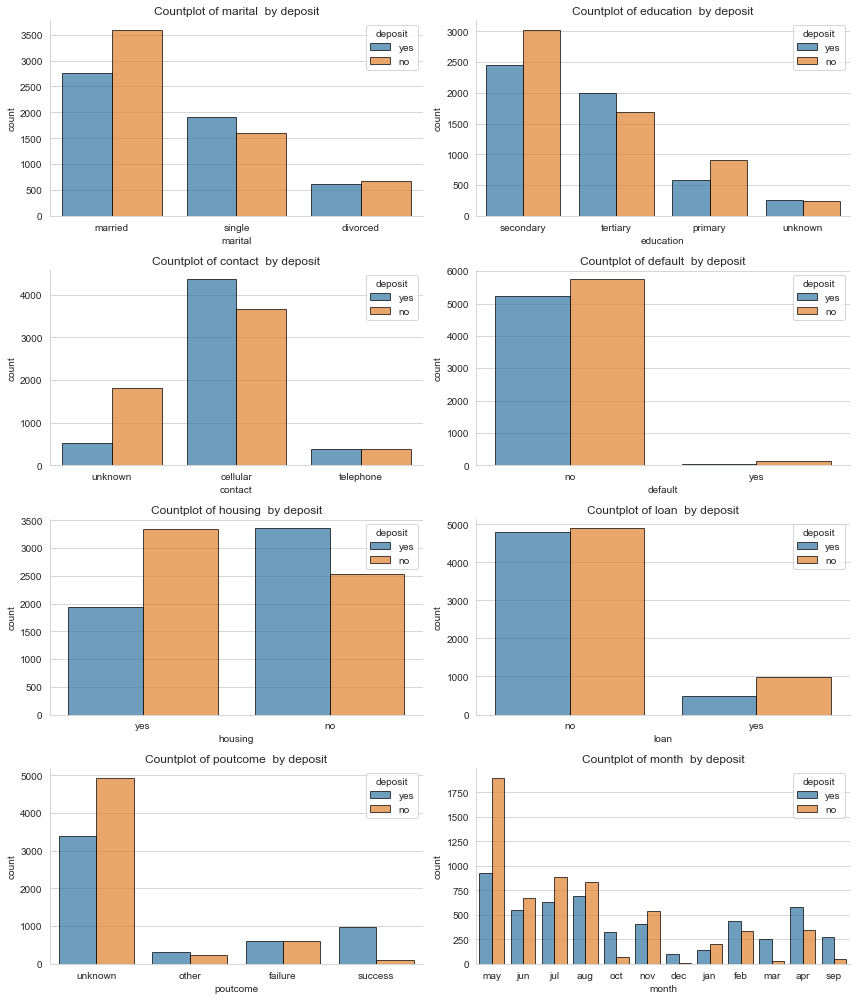

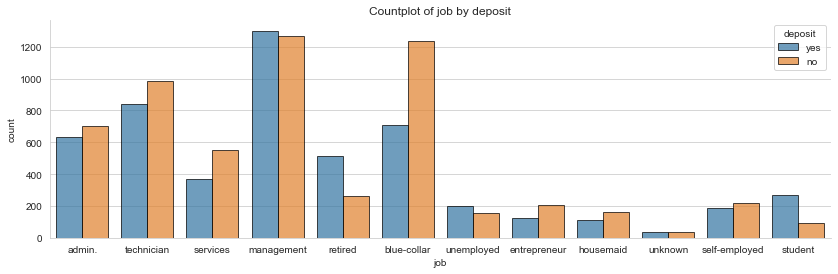

In [8]:
plt.figure(figsize=[12,14])
features=["marital", "education", "contact", "default", "housing", "loan", "poutcome", "month"]
n=1
for f in features:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='deposit', edgecolor="black", alpha=0.7, data=df)
    sns.despine()
    plt.title("Countplot of {}  by deposit".format(f))
    n=n+1
plt.tight_layout()
plt.show()
    
plt.figure(figsize=[14,4])
sns.countplot(x='job', hue='deposit',edgecolor="black", alpha=0.7, data=df)
sns.despine()
plt.title("Countplot of job by deposit")
plt.show()

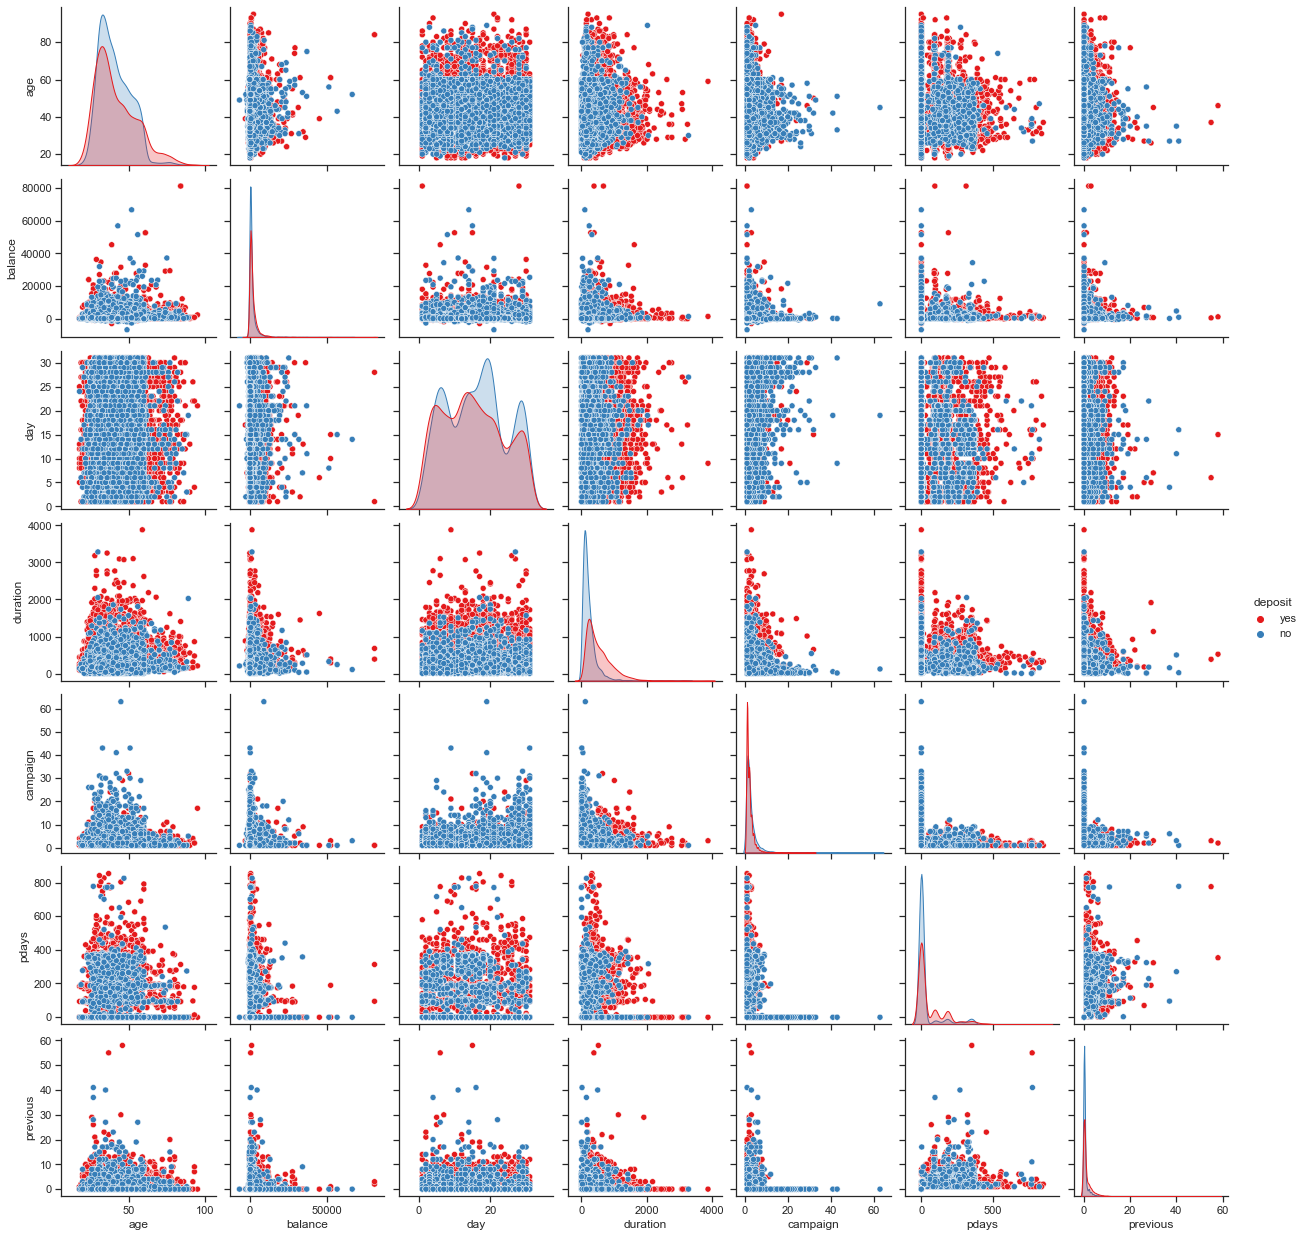

In [9]:
sns.set(style="ticks")

sns.pairplot(df, hue="deposit", palette="Set1")
plt.show()

In [10]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit','']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  7


In [11]:
# Checking discrete
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 7


In [12]:
# Checking continuous
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 0


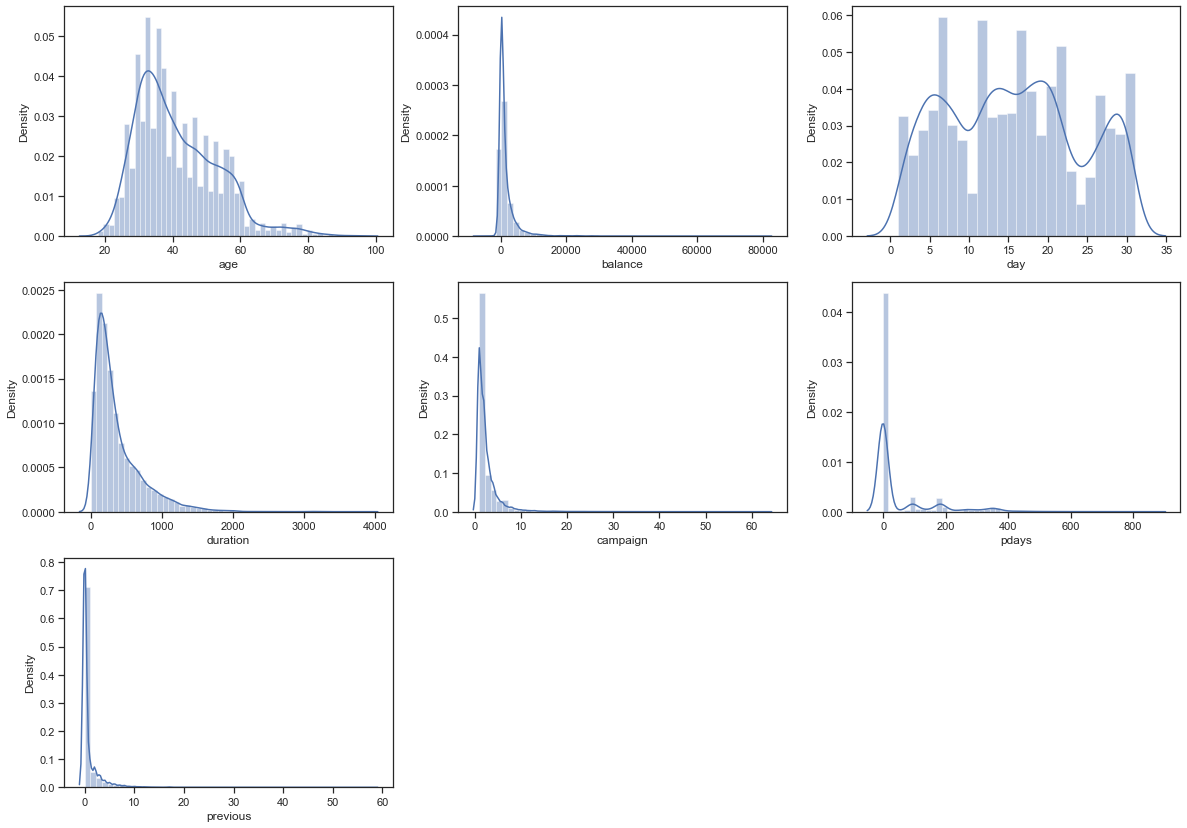

In [13]:
# Plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for discrete_feature in discrete_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[discrete_feature])
    plt.xlabel(discrete_feature)
    plotnumber+=1
plt.show()

In [14]:
# List of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit','']))]
print('Number of numerical variables: ', len(numerical_features))

Number of numerical variables:  7


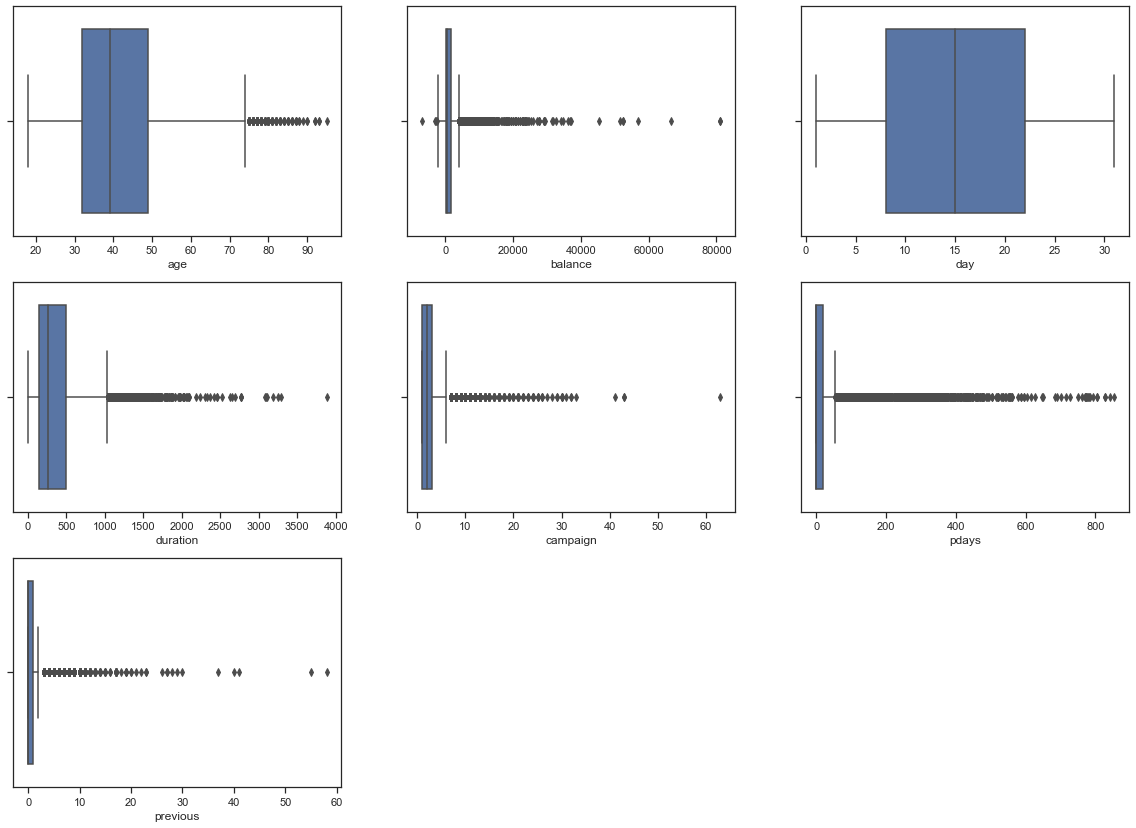

In [15]:
# Boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [16]:
# Find the unique values from categorical features
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital
['married' 'single' 'divorced']
education
['secondary' 'tertiary' 'primary' 'unknown']
default
['no' 'yes']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome
['unknown' 'other' 'failure' 'success']
deposit
['yes' 'no']


In [17]:
# Handle binary features
bool_columns = ['housing', 'loan', 'deposit', 'default']
for col in  bool_columns:
    df[col+'_new']=df[col].apply(lambda x : 1 if x == 'yes' else 0)
    df.drop(col, axis=1, inplace=True)

We'll drop the unknown variables for both job and education, since it won't affect greatly on calculation

In [18]:
df = df.drop(df.loc[df["job"] == "unknown"].index)

In [19]:
df = df.drop(df.loc[df["education"] == "unknown"].index)

In [20]:
# Handle categorical features
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df = pd.concat([df.drop(col, axis=1),pd.get_dummies(df[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [21]:
df.head()

,age,balance,day,duration,campaign,pdays,previous,housing_new,loan_new,deposit_new,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


<AxesSubplot:>

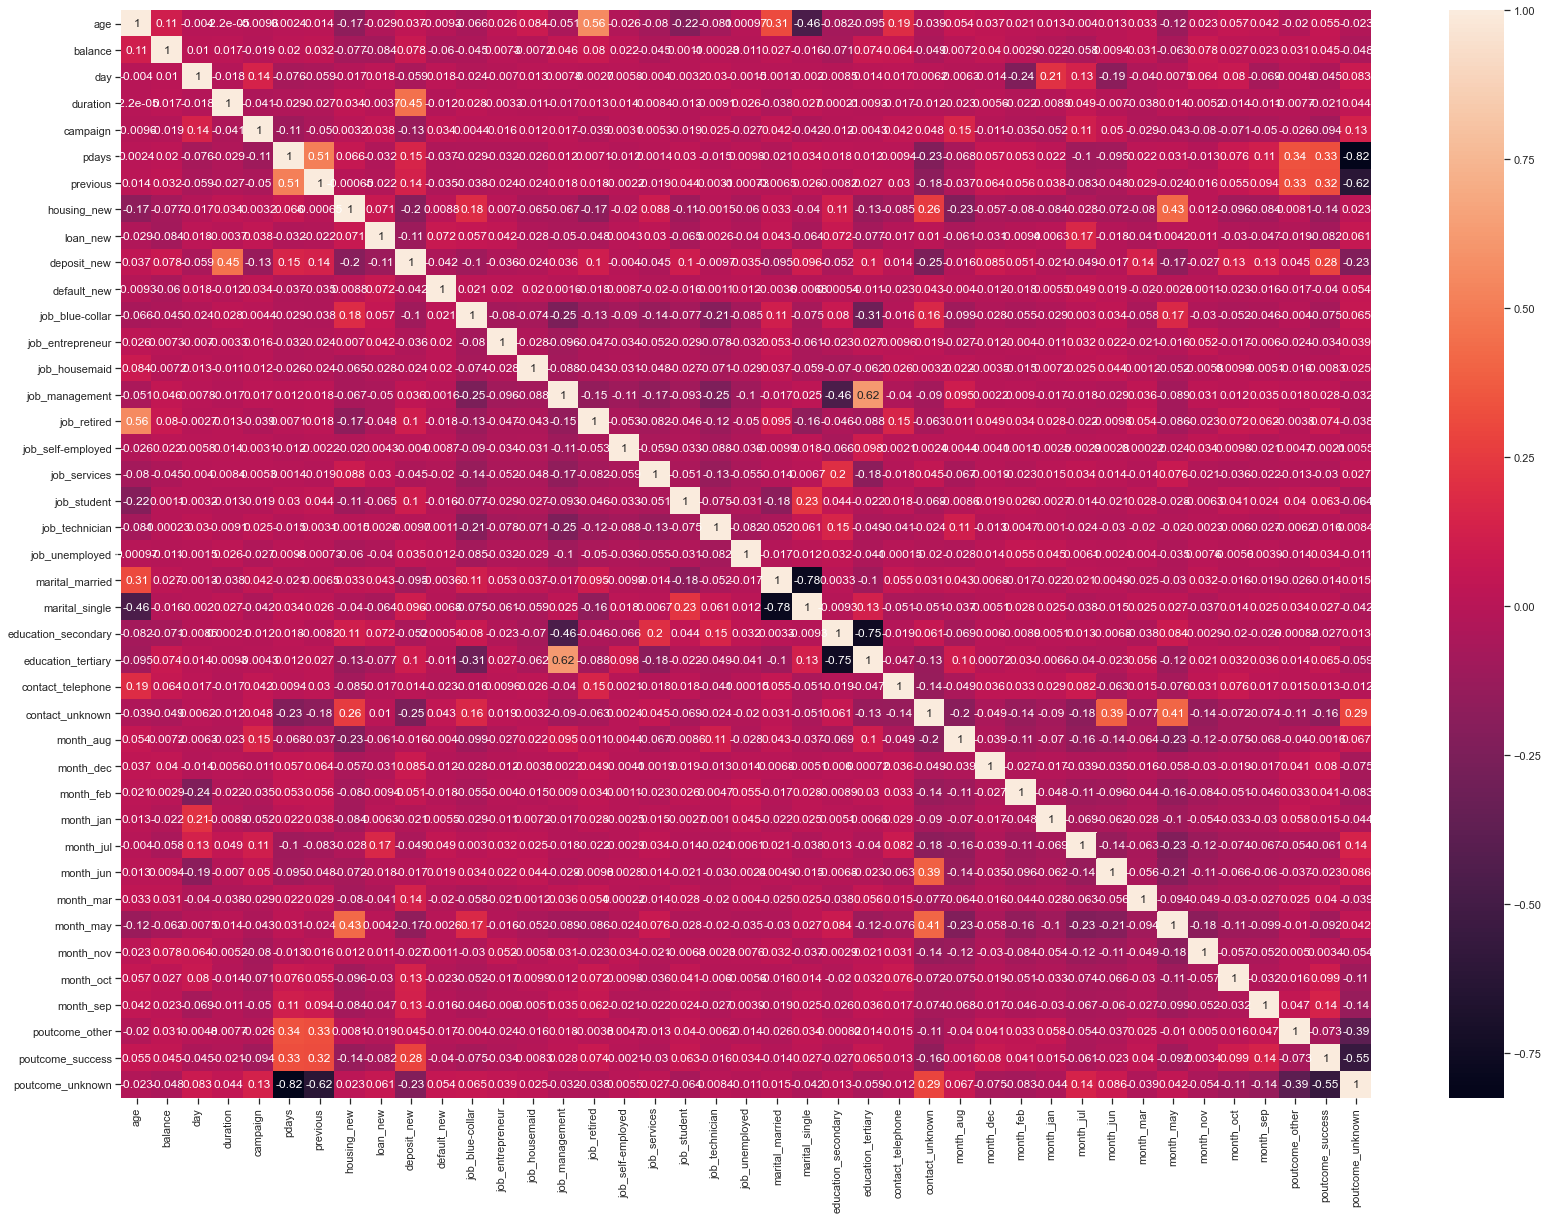

In [22]:
# Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(28,20))
sns.heatmap(cor_mat,annot=True)

## Making Split 

In [23]:
from sklearn.model_selection import train_test_split
X = df.drop(['deposit_new'],axis=1)
y = df['deposit_new']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Standard Scaling
Now, in order to suppress the gap between data and the outliers, we need to normalize it

In [24]:
from sklearn.preprocessing import StandardScaler
standardize = StandardScaler()
standardized_X_test = standardize.fit_transform(X_test)
standardized_X_train = standardize.fit_transform(X_train)

In [25]:
standardized_X_test[0:10,]

array([[-1.4932084 , -0.2922636 , -0.30443819,  0.35879232, -0.19880057,
        -0.48875045, -0.3731185 , -0.95359096, -0.39255137, -0.13666807,
        -0.45212472, -0.1689082 , -0.16292453, -0.56884472, -0.27346891,
        -0.19117978, -0.3022067 ,  5.02585906, -0.43313357, -0.1831057 ,
        -1.1237286 ,  1.43695564,  0.9957776 , -0.74715578, -0.27147772,
        -0.51582112,  2.56835133, -0.10682822, -0.25826363, -0.17327496,
        -0.38694926, -0.35411414, -0.16594045, -0.594183  , -0.30497755,
        -0.19380654, -0.18034487, -0.23464766, -0.32393682,  0.5920103 ],
       [ 0.34585024, -0.25760184,  1.61490981, -0.08903439,  1.57638332,
        -0.48875045, -0.3731185 ,  1.04866765, -0.39255137, -0.13666807,
        -0.45212472, -0.1689082 , -0.16292453, -0.56884472, -0.27346891,
        -0.19117978,  3.30899353, -0.19897096, -0.43313357, -0.1831057 ,
         0.88989459, -0.69591571,  0.9957776 , -0.74715578, -0.27147772,
         1.93865656, -0.38935483, -0.10682822, -0.

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## KNN

In [27]:
pipe_knn= make_pipeline(KNeighborsClassifier())
 
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
               scoring='accuracy',
               cv=10)

gs_knn_scores = cross_val_score(gs_knn, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

gs_knn.fit(X_train, y_train)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_knn.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_knn.score(X_test, y_test)*100))

Train Accuracy:   80.3%
CV Mean Accuracy: 74.8%
Test Accuracy:    76.1%


## SVM

In [28]:
# pipeline combining transformers and estimator
pipe_svm= make_pipeline(StandardScaler(), SVC(random_state=1))

# grid searh to choose the best (combination of) hyperparameters
r=[0.1,1,10]
pg_svm=[{'svc__C':r, 'svc__kernel':['linear']},
        {'svc__C':r, 'svc__gamma':r, 'svc__kernel':['rbf']}]

gs_svm=GridSearchCV(estimator= pipe_svm,
               param_grid= pg_svm,
               scoring='accuracy',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_svm_scores = cross_val_score(gs_svm, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

# fit, and fit with best estimator
gs_svm.fit(X_train, y_train)
gs_svm_best=gs_svm.best_estimator_
gs_svm_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_svm.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_svm_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_svm.score(X_test, y_test)*100))

Train Accuracy:   82.8%
CV Mean Accuracy: 82.7%
Test Accuracy:    83.7%


## Random Forest

In [29]:
rf= RandomForestClassifier(random_state=1)

pg_rf={'n_estimators': [100,200,400],'max_depth': [20,40,50,60]}

gs_rf=GridSearchCV(estimator= rf,
               param_grid= pg_rf,
               scoring='accuracy',
               cv=2)

gs_rf_scores = cross_val_score(gs_rf, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

gs_rf.fit(X_train, y_train)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_rf.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_rf.score(X_test, y_test)*100))

Train Accuracy:   99.6%
CV Mean Accuracy: 85.1%
Test Accuracy:    86.7%


## XGBoost 

In [30]:
xb= xgb.XGBClassifier(random_state=1)

pg_xb={'n_estimators':[100,200,400], 'max_depth':[20,40,50]}

gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='accuracy',
               cv=2)

gs_xb_scores = cross_val_score(gs_xb, X=X_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1)

gs_xb.fit(X_train, y_train)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(X_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_xb.score(X_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_xb_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_xb.score(X_test, y_test)*100))

[11:44:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:45:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:45:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## Great! Testing is done
I'll take the XGBoost, since it has 100% Train accuracy. But we still need the classification_report to check the Precision, recall, f1

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
y_preds=gs_xb_best.predict(X_test)
print(confusion_matrix(y_preds ,y_test))
print(classification_report(y_preds ,y_test))

[[948 110]
 [178 891]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1058
           1       0.89      0.83      0.86      1069

    accuracy                           0.86      2127
   macro avg       0.87      0.86      0.86      2127
weighted avg       0.87      0.86      0.86      2127



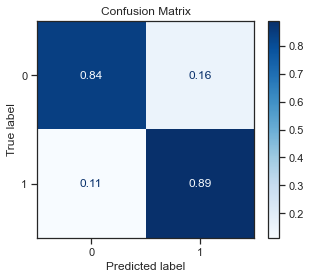

In [32]:
from sklearn.metrics import plot_confusion_matrix
# Generate confusion matrix
matrix = plot_confusion_matrix(gs_xb, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

## Conclusion
1. Marital with married status is likely to deposit, since it could be for their kids
2. Education with secondary is likely to deposit, it depends on the country's or city's education level and job status
3. Tertiary education against management job have considerably high correlation (0.62). Marketing team need to check further the cause factor
4. Longer duration = likely to deposit. Need a longer gap for each contact, the potential client could've reject if the marketing too intensive. 
5. Higher pdays = likely to deposit. The solution is the same as no.4
6. There's a high gap between yes and no deposit. Marketing team needs address the problem, they need to change their tactic on how to approach them, ex: by giving them more benefit on the terms, customizing maturity time.
7. Retired is likely to deposit. 
8. Month:
    There's high gap between yes and no deposit on May
    Sep-Apr, could be consider success since there's higher yes than no. So, they could apply the same tactic for May-Aug